Preface:
Our project was initially focused on detecting and classifying snowleopards using camera trap imagery, this essentially made our problem a COD problem, therefore most of our research regarding datasets was primarly focuse on COD oriented datasets like the COD10k. However, upon further research and discussion with Sir Murtaza Taj, we realized that we have to redefine the scope of the project, due to one of the major reasons: lack of snowleopard imagery. Therefore we broadened our scope to target not just snow leopards but big cats in general, since they pose a similar threat to civilization, and need a similar alarm system.

As we learned through our discussions with sir, even sota Mega Detector struggles to classify an image as empty ( no animal in the frame), since it has been mostly trained on non empty camera trap imagery, so a possible method to improve the perfomance of the Mega Detector is to merge empty images with our already non empty LILA dastaset which the Mega Detector is trained on.
However, during our EDA, we obserrved that many datasets like the Snapshot Datasets have classes of empty images, if the MD is trained on LILA datsets then imrovements using solutions that cater to empty images wont yield substatntial results

In this notebook we have explored 2 datasets, COD10k and LILA, we include Cod10k becuase mst big Cats are skilled in camouflage, and training on data with camouflaged images can be advantageous in improving results.


**COD10K Data**
The dataset consists of 10,000 high-quality images, split into:

6,000 training images

4,000 testing images

Each image is annotated with segmentation masks and object boundaries, providing pixel-level detail. This is particularly advantageous for model training tasks requiring fine-grained localization and shape learning—something that can be especially useful when animals are partially obscured or camouflaged in natural scenes.

The dataset includes 69 annotated classes:

{'1':'batFish','2':'clownFish','3':'crab','4':'crocodile','5':'crocodileFish','6':'fish','7':'flounder','8':'frogFish','9':'ghostPipefish','10':'leafySeaDragon','11':'octopus','12':'pagurian','13':'pipefish','14':'scorpionFish','15':'seaHorse','16':'shrimp','17':'slug','18':'starFish','19':'stingaree','20':'turtle','21':'ant','22':'bug','23':'cat','24':'caterpillar','25':'centipede','26':'chameleon','27':'cheetah','28':'deer','29':'dog','30':'duck','31':'gecko','32':'giraffe','33':'grouse','34':'human','35':'kangaroo','36':'leopard','37':'lion','38':'lizard','39':'monkey','40':'rabbit','41':'reccoon','42':'sciuridae','43':'sheep','44':'snake','45':'spider','46':'stickInsect','47':'tiger','48':'wolf','49':'worm','50':'bat','51':'bee','52':'beetle','53':'bird','54':'bittern','55':'butterfly','56':'cicada','57':'dragonfly','58':'frogmouth','59':'grasshopper','60':'heron','61':'katydid','62':'mantis','63':'mockingbird','64':'moth','65':'owl','66':'owlfly','67':'frog','68':'toad','69':'other'}

covering a diverse set of animals and insects, both terrestrial and aquatic. Notably, among these classes are several big cats:

Lion

Tiger

Cheetah

Leopard

Although there is no dedicated class for the snow leopard, the presence of these four major big cat categories allows for a targeted selection of relevant images when building models focused on felid classification or camouflage-resistant detection systems.

Strengths of COD10K

Detailed Annotations: Each object is accompanied by segmentation masks and border information, which makes it possible to train models that understand object shapes and contours—an asset when detecting animals hidden in complex environments. this can be halpfull in our Big Cat detection/ Classification problem since many big cats are skillfull in camouflaging in their surroundings

Camouflage Focus: The dataset is purpose-built for camouflaged object detection, making it uniquely valuable for research into animals that are difficult to visually isolate, a common challenge in wildlife monitoring.

Limitations to Consider
Sparse and Specific Focus: COD10K is not a general wildlife dataset. It primarily includes camouflaged and center-aligned objects, which may not represent real-world diversity in animal positioning and visibility.

Presence of Irrelevant Classes: The dataset includes a significant number of aquatic species and insects, as well as non animal objects,  which may need to be filtered out for projects focused solely on big cats or terrestrial animals.

Limited Big Cat Samples: While big cats are present, the number of examples per class may be relatively small compared to larger datasets like those in LILA.

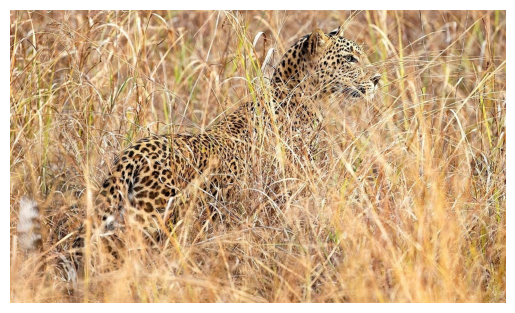

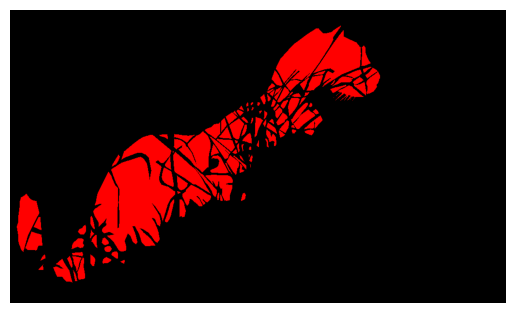

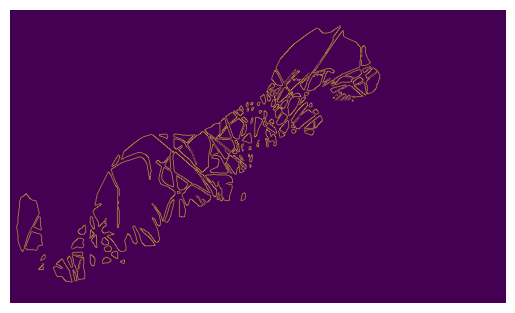

In [1]:
from PIL import Image
import matplotlib.pyplot as plt


# Path to the image in the content folder
image_path = '/content/imageCod10k1.jpg'

# Open the image
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

image_path = '/content/imageCode10k2.png'

# Open the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
image_path = '/content/imageCod10k3.png'

# Open the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

The LILA (Labeled Information Library of Alexandria) dataset is a comprehensive and expansive repository that hosts a wide variety of wildlife datasets, primarily captured through camera traps. This dataset collection is widely recognized for its utility in ecological monitoring, conservation research, and computer vision applications related to wildlife detection and classification.

One of the key components of LILA is that it aggregates numerous well-curated and labeled datasets from around the world, making it a go-to source for state-of-the-art (SOTA) research in animal detection and classification such as the mega detector which is the current state of the artr in wilife detection, especially using deep learning models. These datasets include annotations and metadata that support supervised learning and evaluation of wildlife imagery.

For our project, we are particularly interested in leveraging the LILA dataset to study big cat species such as lions, tigers, leopards, cheetahs, and similar carnivores captured via camera traps. These apex predators are often focal points in human wildlife interaction due to the threat they pose to civiliazation.

To help us with the extraction and understanding of available annotations within the LILA archive, we utilized a specialized script provided in the MegaDetector GitHub repository:

https://github.com/agentmorris/MegaDetector/tree/main/megadetector/data_management/lila



https://github.com/agentmorris/MegaDetector/blob/main/megadetector/data_management/lila/get_lila_annotation_counts.py

This script is part of a functional and user-friendly codebase that includes prebuilt functions for data access and management. It enabled us to efficiently retrieve a summary of all classes (i.e., animal species and object labels) across the various datasets included in LILA. By running this script, we obtained a structured overview of the available annotations, which helped us identify which datasets contain the big cat species of interest.
Thre results are shared in the cells below



the **findings** are as follows:


one of the biggest camera trapping imagery dataset
**Snapshot Serengity** ,with 7.1M total images, has the following classes and respective counts:

lionfemale (panthera leo): 16605

lionmale (panthera leo): 5488

cheetah (acinonyx jubatus): 6806

leopard (panthera pardus): 650

lioncub (panthera leo): 73

as can be seen, the single dataset alone has vast amounts of big Cat Camera trap imagery that is useful to building, training a model that can affectivley classify between big Cats and non-big Cats, plenty of more imagery is availaible in other datasets within LILA as well

the vastness of the LILA dataset makes it the best avialiable candidate,
However, it's important to recognize a key limitation: not all datasets within LILA include bounding box annotations. While some provide object-level localization, many,including Snapshot Serengeti, only offer image-level labels. This can reduce the effectiveness of models that rely on bounding boxes to isolate the subject within an image and learn more focused features, especially in cluttered or natural environments common to camera trap setups.

In [1]:
!git clone https://github.com/agentmorris/MegaDetector.git



Cloning into 'MegaDetector'...
remote: Enumerating objects: 22660, done.
remote: Counting objects: 100% (362/362), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 22660 (delta 257), reused 235 (delta 180), pack-reused 22298 (from 4)
Receiving objects: 100% (22660/22660), 190.05 MiB | 23.43 MiB/s, done.
Resolving deltas: 100% (15068/15068), done.


In [ ]:
import megadetector
print("Module found")


Module found


In [ ]:
pip install megadetector


In [ ]:
"""

get_lila_annotation_counts.py

Generates a .json-formatted dictionary mapping each LILA dataset to all categories
that exist for that dataset, with counts for the number of occurrences of each category
(the number of *annotations* for each category, not the number of *images*).

Also loads the taxonomy mapping file, to include scientific names for each category.

get_lila_image_counts.py counts the number of *images* for each category in each dataset.

"""

#%% Constants and imports

import json
import os

from megadetector.data_management.lila.lila_common import \
    read_lila_metadata, read_metadata_file_for_dataset, read_lila_taxonomy_mapping

# cloud provider to use for downloading images; options are 'gcp', 'azure', or 'aws'
preferred_cloud = 'gcp'

# array to fill for output
category_list = []

# We'll write images, metadata downloads, and temporary files here
lila_local_base = os.path.expanduser('~/lila')

output_dir = os.path.join(lila_local_base,'lila_categories_list')
os.makedirs(output_dir,exist_ok=True)

metadata_dir = os.path.join(lila_local_base,'metadata')
os.makedirs(metadata_dir,exist_ok=True)

output_file = os.path.join(output_dir,'lila_dataset_to_categories.json')


#%% Load category and taxonomy files

taxonomy_df = read_lila_taxonomy_mapping(metadata_dir)


#%% Map dataset names and category names to scientific names

ds_query_to_scientific_name = {}

unmapped_queries = set()

datasets_with_taxonomy_mapping = set()

# i_row = 1; row = taxonomy_df.iloc[i_row]; row
for i_row,row in taxonomy_df.iterrows():

    datasets_with_taxonomy_mapping.add(row['dataset_name'])

    ds_query = row['dataset_name'] + ':' + row['query']
    ds_query = ds_query.lower()

    if not isinstance(row['scientific_name'],str):
        unmapped_queries.add(ds_query)
        ds_query_to_scientific_name[ds_query] = 'unmapped'
        continue

    ds_query_to_scientific_name[ds_query] = row['scientific_name']

print('Loaded taxonomy mappings for {} datasets'.format(len(datasets_with_taxonomy_mapping)))


#%% Download and parse the metadata file

metadata_table = read_lila_metadata(metadata_dir)

print('Loaded metadata URLs for {} datasets'.format(len(metadata_table)))


#%% Download and extract metadata for each dataset

for ds_name in metadata_table.keys():
    metadata_table[ds_name]['json_filename'] = read_metadata_file_for_dataset(ds_name=ds_name,
                                                                         metadata_dir=metadata_dir,
                                                                         metadata_table=metadata_table)


#%% Get category names and counts for each dataset

# Takes ~5 minutes

from collections import defaultdict

dataset_to_categories = {}

# ds_name = 'NACTI'
for ds_name in metadata_table.keys():

    taxonomy_mapping_available = (ds_name in datasets_with_taxonomy_mapping)

    if not taxonomy_mapping_available:
        print('Warning: taxonomy mapping not available for {}'.format(ds_name))

    print('Finding categories in {}'.format(ds_name))

    json_filename = metadata_table[ds_name]['json_filename']
    base_url = metadata_table[ds_name]['image_base_url_' + preferred_cloud]
    assert not base_url.endswith('/')

    # Open the metadata file
    with open(json_filename, 'r') as f:
        data = json.load(f)

    # Collect list of categories and mappings to category name
    categories = data['categories']

    category_id_to_count = defaultdict(int)
    annotations = data['annotations']

    # ann = annotations[0]
    for ann in annotations:
        category_id_to_count[ann['category_id']] = category_id_to_count[ann['category_id']] + 1

    # c = categories[0]
    for c in categories:
       count = category_id_to_count[c['id']]
       if 'count' in c:
           assert 'bbox' in ds_name or c['count'] == count
       c['count'] = count

       # Don't do taxonomy mapping for bbox data sets, which are sometimes just binary and are
       # always redundant with the class-level data sets.
       if 'bbox' in ds_name:
           c['scientific_name_from_taxonomy_mapping'] = None
       elif not taxonomy_mapping_available:
           c['scientific_name_from_taxonomy_mapping'] = None
       else:
           taxonomy_query_string = ds_name.lower().strip() + ':' + c['name'].lower()
           if taxonomy_query_string not in ds_query_to_scientific_name:
               print('No match for query string {}'.format(taxonomy_query_string))
               # As of right now, this is the only quirky case
               assert '#ref!' in taxonomy_query_string and 'wcs' in ds_name.lower()
               c['scientific_name_from_taxonomy_mapping'] = None
           else:
               sn = ds_query_to_scientific_name[taxonomy_query_string]
               assert sn is not None and len(sn) > 0
               c['scientific_name_from_taxonomy_mapping'] = sn

    dataset_to_categories[ds_name] = categories

# ...for each dataset


#%% Print the results

# ds_name = list(dataset_to_categories.keys())[0]
for ds_name in dataset_to_categories:

    print('\n** Category counts for {} **\n'.format(ds_name))

    categories = dataset_to_categories[ds_name]
    categories = sorted(categories, key=lambda x: x['count'], reverse=True)

    for c in categories:
        print('{} ({}): {}'.format(c['name'],c['scientific_name_from_taxonomy_mapping'],c['count']))

# ...for each dataset


#%% Save the results

with open(output_file, 'w') as f:
    json.dump(dataset_to_categories,f,indent=1)


Loaded taxonomy mappings for 24 datasets
Loaded metadata URLs for 24 datasets
Finding categories in Caltech Camera Traps
Finding categories in ENA24
Finding categories in Missouri Camera Traps
Finding categories in NACTI
Finding categories in WCS Camera Traps
No match for query string wcs camera traps:#ref!
Finding categories in Wellington Camera Traps
Finding categories in Island Conservation Camera Traps
Finding categories in Channel Islands Camera Traps
Finding categories in Idaho Camera Traps
Finding categories in Snapshot Serengeti
Finding categories in Snapshot Karoo
Finding categories in Snapshot Kgalagadi
Finding categories in Snapshot Enonkishu
Finding categories in Snapshot Camdeboo
Finding categories in Snapshot Mountain Zebra
Finding categories in Snapshot Kruger
Finding categories in SWG Camera Traps
Finding categories in Orinoquia Camera Traps
Finding categories in Trail Camera Images of New Zealand Animals
Finding categories in Desert Lion Conservation Camera Traps
Findi